In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def firstDigit(number):
    if number == 0:
        return 0
    else:
        digits = (int)(math.log10(number)) 
        number = (int)(number / pow(10, digits)) 
        return number
def graph(excel_file,col_name):
    df_data = pd.read_excel(excel_file)
    col = list(df_data[col_name])
    length = len(col)
    
    dict_freq = {}
    for i in range(1,10):
        dict_freq[str(i)] = 0
    for i in col:
        if (type(i) is int or type(i) is float) and i>0:
            f_digit = firstDigit(i)
            dict_freq[str(f_digit)]+=1

    benford_dict = {}
    for i in range(1,10):
        benford_dict[str(i)] = math.log10(1+1/i)
    freq_ben = np.array(list(benford_dict.values()))
    total_entries = 0
    for i in list(dict_freq.values()):
        total_entries+=i
        
        
    digits = list(dict_freq.keys())
    frequency = list(dict_freq.values())
    benford_freq = freq_ben * total_entries

    plt.bar(range(len(dict_freq)),frequency,tick_label=digits,color = 'silver')
    plt.plot(digits,frequency,label=f"Realtime-{col_name} Metric Analysis",color='black',linestyle='dashed',linewidth=3,marker='o')
    plt.plot(digits,benford_freq,label="Actual Benford's Analysis",color='blue',linestyle='dashed',linewidth=3,marker='*')
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig(f'result_{col_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

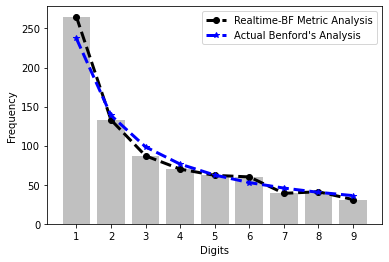

In [3]:
graph('./Sachin Tendulkar Batting Stats.xlsx','BF')

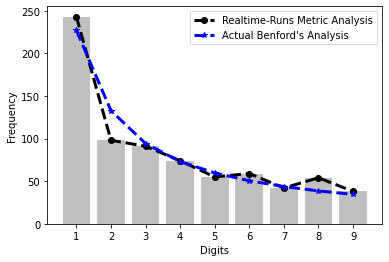

In [4]:
graph('./Sachin Tendulkar Batting Stats.xlsx','Runs')